In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import pickle

In [245]:
df=pd.read_excel("DATA-OUARZAZATE.xlsx")

In [246]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Column1                    5 non-null      object 
 1   T_Air_C_Avg                5 non-null      float64
 2   RH_Avg                     5 non-null      float64
 3   V_Vent_m_s_Avg             5 non-null      float64
 4   Ray_Tot_KWh_m2_Tot cumulé  5 non-null      float64
 5   Perte_réflectance          5 non-null      float64
dtypes: float64(5), object(1)
memory usage: 368.0+ bytes


In [247]:
df.head()

,Column1,T_Air_C_Avg,RH_Avg,V_Vent_m_s_Avg,Ray_Tot_KWh_m2_Tot cumulé,Perte_réflectance
0,T1,15.304166,20.666404,2.675039,368.790973,0.43
1,T2,22.252890,26.056763,3.352306,79.464000,2.15
2,T3,24.752091,21.874246,3.039579,615.380000,0.31
3,T4,16.943558,20.983569,3.333030,107.061000,0.38
4,T5,33.502494,10.726741,4.052095,326.985000,0.62


In [248]:
df=df[["T_Air_C_Avg", "RH_Avg","V_Vent_m_s_Avg", "Ray_Tot_KWh_m2_Tot cumulé", "Perte_réflectance"]]
df.head()

,T_Air_C_Avg,RH_Avg,V_Vent_m_s_Avg,Ray_Tot_KWh_m2_Tot cumulé,Perte_réflectance
0,15.304166,20.666404,2.675039,368.790973,0.43
1,22.252890,26.056763,3.352306,79.464000,2.15
2,24.752091,21.874246,3.039579,615.380000,0.31
3,16.943558,20.983569,3.333030,107.061000,0.38
4,33.502494,10.726741,4.052095,326.985000,0.62


In [249]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
T_Air_C_Avg,5.0,22.551040,7.225457,15.304166,16.943558,22.252890,24.752091,33.502494
RH_Avg,5.0,20.061545,5.647634,10.726741,20.666404,20.983569,21.874246,26.056763
V_Vent_m_s_Avg,5.0,3.290410,0.506806,2.675039,3.039579,3.333030,3.352306,4.052095
Ray_Tot_KWh_m2_Tot cumulé,5.0,299.536195,218.394964,79.464000,107.061000,326.985000,368.790973,615.380000
Perte_réflectance,5.0,0.778000,0.775545,0.310000,0.380000,0.430000,0.620000,2.150000


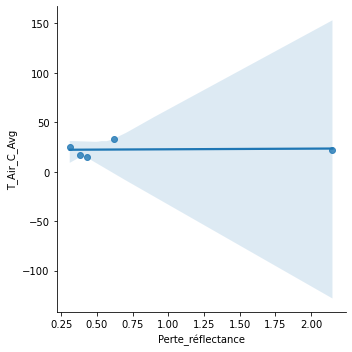

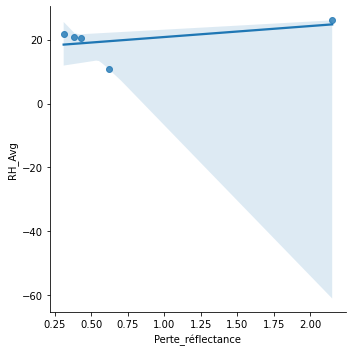

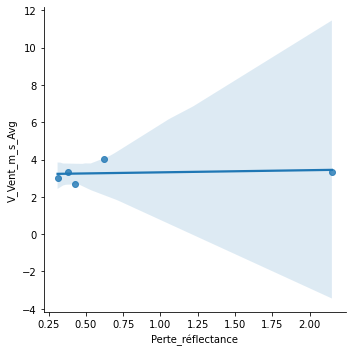

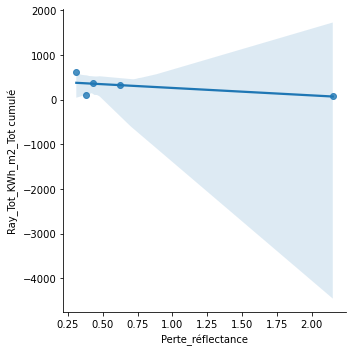

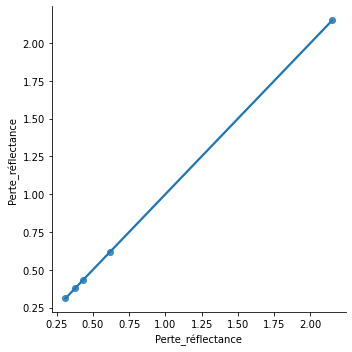

In [250]:

for i in list(df.columns):
    sns.lmplot(y=i, x='Perte_réflectance', data=df)

In [251]:
X= df.drop("Perte_réflectance", axis=1)
y = df["Perte_réflectance"]


In [252]:
X

,T_Air_C_Avg,RH_Avg,V_Vent_m_s_Avg,Ray_Tot_KWh_m2_Tot cumulé
0,15.304166,20.666404,2.675039,368.790973
1,22.252890,26.056763,3.352306,79.464000
2,24.752091,21.874246,3.039579,615.380000
3,16.943558,20.983569,3.333030,107.061000
4,33.502494,10.726741,4.052095,326.985000


In [253]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [254]:
y_predict=linear_reg.predict(X)

In [255]:
erreur  = np.sqrt(mean_squared_error(y, y_predict))

In [256]:
erreur

3.219455347959566e-15

# model de Random Forest 


In [257]:

random_forest_reg = RandomForestRegressor(random_state=0)
model=RandomForestRegressor()
model.fit(X.values, y.values)


RandomForestRegressor()

In [258]:
y_pred = model.predict(X)

C:\Users\Abdel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [259]:
error = np.sqrt(mean_squared_error(y, y_pred))
print(error)

0.299741898973099


In [260]:
score=model.score(X,y_predict)
score

C:\Users\Abdel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.8132799516185363

In [261]:
x=np.array([[20,20,30,200]])
y_predict=model.predict(x)
y_predict

array([0.6701])

# saving model

In [264]:
data = {"model": model, "error": error , "score": score}
with open('finalized_model_ouarzazate.pkl', 'wb') as file:
    pickle.dump(data, file)

In [265]:
with open('finalized_model_ouarzazate.pkl', 'rb') as file:
    data = pickle.load(file)
rp=model
y_pred = rp.predict(x)
y_pred

array([0.6701])